In [1]:
import pandas as pd
import numpy as np

In [11]:
df_train = pd.read_csv('train_wn75k28.csv', index_col='id')
df_train.head(10)

,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
id,,,,,,,,,,,,,,,,,,
1,2021-01-01,1,2,2.0,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0
2,2021-01-01,2,1,2.0,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0
3,2021-01-01,9,3,3.0,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0
4,2021-01-01,6,7,2.0,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0
5,2021-01-01,4,6,NaN,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0
6,2021-01-01,3,4,3.0,2019-07-02,0,0,0,0,0,1,0,0,0,0,0,0,0
7,2021-01-01,5,1,1.0,2019-07-24,0,0,0,0,0,0,0,0,0,0,0,0,0
8,2021-01-01,7,3,NaN,2020-12-12,0,0,0,0,0,1,0,0,0,0,1,0,0
9,2021-01-01,13,6,3.0,2018-06-21,0,0,0,0,1,0,0,0,0,0,0,0,0


In [12]:
df_train['signup_date'].value_counts()

df_train.head()

,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
id,,,,,,,,,,,,,,,,,,
1,2021-01-01,1,2,2.0,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0
2,2021-01-01,2,1,2.0,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0
3,2021-01-01,9,3,3.0,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0
4,2021-01-01,6,7,2.0,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0
5,2021-01-01,4,6,NaN,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0


In [13]:
df_train['was_signupdate_null'] = df_train['signup_date'].isna()

In [14]:
ser = pd.to_datetime(df_train['created_at']) - pd.to_datetime(df_train['signup_date'])
df_train['diff_between_dates'] = ser.dt.days

In [15]:
pd.to_datetime(df_train['created_at']).dt.dayofweek
# created_at_dates.dt.dayofweek.unique()

id
1        4
2        4
3        4
4        4
5        4
        ..
39157    4
39158    4
39159    4
39160    4
39161    4
Name: created_at, Length: 39161, dtype: int64

In [16]:
df_train['diff_between_dates'].fillna(10000, inplace=True)

In [17]:
df_train['signup_was_before'] = [1 if x >= 0 else 0 for x in df_train['diff_between_dates']]

In [18]:
df_train['was_signupdate_null'] = df_train['was_signupdate_null'].astype(int)

In [19]:
df_train.tail()

,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,...,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy,was_signupdate_null,diff_between_dates,signup_was_before
id,,,,,,,,,,,,,,,,,,,,,
39157,2021-12-31,11,11,2.0,2017-10-19,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1534.0,1
39158,2021-12-31,3,9,3.0,NaN,0,0,0,0,0,...,0,0,0,0,0,0,0,1,10000.0,1
39159,2021-12-31,8,7,2.0,NaN,1,0,0,0,1,...,1,0,0,0,0,0,0,1,10000.0,1
39160,2021-12-31,7,12,2.0,NaN,0,0,0,0,0,...,0,0,0,0,1,0,0,1,10000.0,1
39161,2021-12-31,2,5,NaN,2019-08-11,1,0,0,0,0,...,1,0,0,0,0,0,0,0,873.0,1


In [20]:
# Pre-process steps:

# df_train = pd.read_csv('train_wn75k28.csv', index_col='id')
df_train['products_purchased'].fillna(0, inplace=True)
df_train['created_at_month'] = df_train['created_at'].str.slice(start=5,stop=7).astype(int)
df_train['signup_date_month'] = df_train[df_train['signup_date'].notna()]['signup_date'].str.slice(start=5, stop=7).astype('int')
df_train['signup_date_year'] = df_train[df_train['signup_date'].notna()]['signup_date'].str.slice(stop=4).astype('int')
df_train.drop(columns=['created_at','signup_date'], axis=1, inplace=True)
df_train.fillna(0, inplace=True)
df_train.reset_index(drop=True)


,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,...,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy,was_signupdate_null,diff_between_dates,signup_was_before,created_at_month,signup_date_month,signup_date_year
0,1,2,2.0,0,0,0,0,0,0,1,...,0,0,0,0,0,99.0,1,1,9.0,2020.0
1,2,1,2.0,1,0,1,0,0,0,1,...,0,0,0,0,0,104.0,1,1,9.0,2020.0
2,9,3,3.0,1,0,0,0,0,0,0,...,0,0,0,0,0,-222.0,0,1,8.0,2021.0
3,6,7,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1185.0,1,1,10.0,2017.0
4,4,6,0.0,0,0,0,0,0,0,1,...,0,1,0,0,0,207.0,1,1,6.0,2020.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39156,11,11,2.0,1,0,0,0,1,1,1,...,0,0,0,0,0,1534.0,1,12,10.0,2017.0
39157,3,9,3.0,0,0,0,0,0,0,0,...,0,0,0,0,1,10000.0,1,12,0.0,0.0
39158,8,7,2.0,1,0,0,0,1,0,1,...,0,0,0,0,1,10000.0,1,12,0.0,0.0
39159,7,12,2.0,0,0,0,0,0,1,0,...,0,1,0,0,1,10000.0,1,12,0.0,0.0


In [21]:
from sklearn.model_selection import train_test_split

X = df_train.drop(['buy'], axis=1)
Y = df_train['buy']

X_train, X_test, y_train, y_test = train_test_split(X,Y,stratify=Y,random_state=42, test_size=0.33)

In [22]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import GridSearchCV


# dt = DecisionTreeClassifier(random_state=42)

# params = {'max_depth':[1,2,3,4,5,6,7,8,9,10]}

# clf = GridSearchCV(dt, params, return_train_score=True, n_jobs=-1, cv=5, scoring='f1')

# clf.fit(X_train,y_train)



GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             return_train_score=True, scoring='f1')

In [23]:
# from sklearn.ensemble import RandomForestClassifier

# rf = RandomForestClassifier()

# params = {'n_estimators':[10,30,50,100,200,500,1000]}

# clf_rf = GridSearchCV(rf, params, return_train_score=True, n_jobs=-1, cv=5, scoring='f1')

# clf_rf.fit(X_train,y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'n_estimators': [10, 30, 50, 100, 200, 500, 1000]},
             return_train_score=True, scoring='f1')

In [29]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint


In [37]:
import lightgbm as lgb
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier()

params = {'learning_rate':uniform(0.001, 0.5), 'max_depth': randint(10,100), 'num_leaves':randint(0,100)}

clf = RandomizedSearchCV(lgbm, params, return_train_score=True, n_jobs=-1, cv=5, scoring='f1', verbose=2, n_iter=20)

In [105]:
import xgboost as xgb

xgbm = xgb.XGBClassifier()

params = {'max_depth':[5], 'min_child_weight':[4], 'learning_rate':[0.3], 'colsample_bytree':[0.4], 'n_estimators':[50,60,70,80,90,100]}
clf_grid_xgb = GridSearchCV(xgbm, params, return_train_score=True, n_jobs=-1, cv=5, scoring='f1', verbose=2)


In [106]:
clf_grid_xgb.fit(X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


C:\Users\anshu\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:47:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,...
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_

In [38]:
clf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LGBMClassifier(), n_iter=20, n_jobs=-1,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001585BE14D30>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001585BFEB550>,
                                        'num_leaves': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001585BE0CAC0>},
                   return_train_score=True, scoring='f1', verbose=2)

In [57]:
params = {'max_depth':[9,10,11,12], 'min_child_weight':[6,7,8], 'learning_rate':[0.05, 0.09,0.1], 'num_leaves':[18,19,20], 'colsample_bytree':[0.2,0.3,0.4, 0.5 ,0.6]}
clf_grid = GridSearchCV(lgbm, params, return_train_score=True, n_jobs=-1, cv=2, scoring='f1', verbose=2)

In [58]:
clf_grid.fit(X_train,y_train)

Fitting 2 folds for each of 5184 candidates, totalling 10368 fits


GridSearchCV(cv=2, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'colsample_bytree': [0.3, 0.4, 0.5, 0.7],
                         'learning_rate': [0.05, 0.09, 0.1, 0.12],
                         'max_depth': [1, 5, 6, 7, 8, 9, 10, 11, 12],
                         'min_child_weight': [3, 4, 5, 6, 7, 8],
                         'num_leaves': [20, 21, 22, 23, 24, 25]},
             return_train_score=True, scoring='f1', verbose=2)

In [32]:
sorted(clf.cv_results_.keys())


['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'mean_train_score',
 'param_learning_rate',
 'param_max_depth',
 'param_metric',
 'param_num_leaves',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split0_train_score',
 'split1_test_score',
 'split1_train_score',
 'split2_test_score',
 'split2_train_score',
 'split3_test_score',
 'split3_train_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score',
 'std_train_score']

In [89]:
clf_grid_xgb.best_estimator_


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=4,
              min_child_weight=4, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [81]:
print("BEST TIL NOW")
clf_grid_xgb.best_params_

{'colsample_bytree': 0.4,
 'learning_rate': 0.3,
 'max_depth': 5,
 'min_child_weight': 4}

In [107]:
print("NEW VALUES")
clf_grid_xgb.best_params_

NEW VALUES


{'colsample_bytree': 0.4,
 'learning_rate': 0.3,
 'max_depth': 5,
 'min_child_weight': 4,
 'n_estimators': 90}

In [168]:
print(clf_rf.cv_results_['mean_test_score'])
clf_rf.cv_results_['mean_train_score']

[0.68248845 0.69261544 0.6889735  0.68944808 0.68878119 0.68910179
 0.6884846 ]


array([0.95413017, 0.9917172 , 0.99634528, 0.99953302, 1.        ,
       1.        , 1.        ])

In [157]:
print(clf.cv_results_['mean_test_score'])
clf.cv_results_['mean_train_score']

[0.38067258 0.51501931 0.61264169 0.68500953 0.68344853 0.67885254
 0.67948233 0.67614655 0.67626828 0.67646158]


array([0.38088092, 0.52675938, 0.61937543, 0.68649306, 0.68632482,
       0.68818604, 0.69101677, 0.69639353, 0.70321921, 0.71466958])

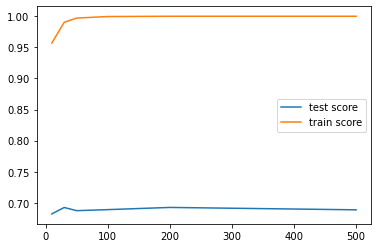

In [158]:
import matplotlib.pyplot as plt

plt.plot(params['n_estimators'],clf_rf.cv_results_['mean_test_score'])
plt.plot(params['n_estimators'],clf_rf.cv_results_['mean_train_score'])
plt.legend(['test score','train score'])

plt.show()

In [159]:
plt.plot(params['max_depth'],clf.cv_results_['mean_test_score'])
plt.plot(params['max_depth'],clf.cv_results_['mean_train_score'])
plt.legend(['test score','train score'])

plt.show()

KeyError: 'max_depth'

In [68]:
# Pre-process steps:

df_test = pd.read_csv('test_Wf7sxXF.csv', index_col='id')
indices = df_test.index.values.tolist()
df_test['was_signupdate_null'] = df_test['signup_date'].isna()
ser = pd.to_datetime(df_test['created_at']) - pd.to_datetime(df_test['signup_date'])
df_test['diff_between_dates'] = ser.dt.days
df_test['diff_between_dates'].fillna(10000, inplace=True)
df_test['signup_was_before'] = [1 if x >= 0 else 0 for x in df_test['diff_between_dates']]
df_test['was_signupdate_null'] = df_test['was_signupdate_null'].astype(int)


df_test['products_purchased'].fillna(0, inplace=True)
df_test['created_at_month'] = df_test['created_at'].str.slice(start=5,stop=7).astype(int)
df_test['signup_date_month'] = df_test[df_test['signup_date'].notna()]['signup_date'].str.slice(start=5, stop=7).astype('int')
df_test['signup_date_year'] = df_test[df_test['signup_date'].notna()]['signup_date'].str.slice(stop=4).astype('int')
df_test.drop(columns=['created_at','signup_date'], axis=1, inplace=True)
df_test.fillna(0, inplace=True)
df_test.reset_index(drop=True)


,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,...,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,was_signupdate_null,diff_between_dates,signup_was_before,created_at_month,signup_date_month,signup_date_year
0,2,2,0.0,1,1,0,0,0,1,0,...,0,0,1,0,0,137.0,1,1,8.0,2021.0
1,4,7,3.0,1,0,0,0,0,0,0,...,0,0,0,0,0,590.0,1,1,5.0,2020.0
2,8,7,0.0,0,0,0,0,1,1,0,...,0,0,0,0,1,10000.0,1,1,0.0,0.0
3,9,8,2.0,0,0,0,0,1,1,1,...,0,0,2,0,0,558.0,1,1,6.0,2020.0
4,4,5,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,297.0,1,1,3.0,2021.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13179,16,12,0.0,0,0,0,0,0,1,1,...,0,0,0,0,1,10000.0,1,3,0.0,0.0
13180,12,8,0.0,1,0,0,0,0,1,0,...,0,0,0,0,0,11.0,1,3,3.0,2022.0
13181,14,14,3.0,0,0,1,0,0,0,1,...,0,0,0,0,0,227.0,1,3,8.0,2021.0
13182,14,10,0.0,0,0,0,0,0,0,1,...,0,0,1,0,1,10000.0,1,3,0.0,0.0


In [161]:
# dt_final = DecisionTreeClassifier(max_depth=5, random_state=42)
# dt_final.fit(X,Y)
# preds = dt_final.predict(df_test)


In [170]:
# rf_final = RandomForestClassifier(n_estimators=500, random_state=42)
# rf_final.fit(X,Y)
# preds = rf_final.predict(df_test)

In [61]:
xgb_final = LGBMClassifier(colsample_bytree=0.5, learning_rate=0.05, max_depth=11,
               min_child_weight=7, num_leaves=20)

xgb_final.fit(X,Y)
preds = xgb_final.predict(df_test)

In [108]:
xgbm_final = xgb.XGBClassifier(min_child_weight = 4, max_depth=4, learning_rate=0.3, gamma=0, colsample_bytree=0.3, n_estimators=90)

xgbm_final.fit(X,Y)
preds = xgbm_final.predict(df_test)

[11:47:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [109]:

df_preds = pd.DataFrame(data={'id':indices, 'buy':preds})
df_preds.head()

,id,buy
0,39162,1
1,39163,0
2,39164,0
3,39165,1
4,39166,0


In [110]:
df_preds.to_csv('submission15.csv', index=False)